# Линейный классификатор

Признаковое пространство может быть разделено гиперплоскостью на два полупространства, в каждом из которых прогнозируется одно из двух значений целевого класса.  Если это можно сделать без ошибок, то обучающая выборка называется линейно разделимой. *linearly separable*.

<img src="img/logit.png">


Рассмотрим задачу бинарной классификации, причем метки целевого класса обозначим "+1" (положительные примеры) и "-1" (отрицательные примеры).
Один из самых простых линейных классификаторов получается на основе регрессии вот таким образом:

$$\Large a(\textbf{x}) = \text{sign}(\textbf{w}^\text{T}\textbf x),$$

где
 - $\textbf{x}$ –  вектор признаков;
 - $\textbf{w}$ – вектор весов линейной модели (со смещением $w_0$);
 - $\text{sign}(\bullet)$ – функция "сигнум", возвращающая знак своего аргумента;
 - $a(\textbf{x})$ – ответ классификатора на пример $\textbf{x}$.



### Логистическая регрессия как линейный классификатор

Логистическая регрессия является частным случаем линейного классификатора, но она обладает хорошим "умением" – прогнозировать вероятность $p_+$ отнесения пример $\textbf{x}_\text{i}$ к классу "+":
$$\Large p_+ = P\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right) $$

Пример, когда нужно спрогнозировать вероятность отнесения к классу:

<img src="img/toy_scorecard_eng.png" width=60%>

Умеем строить линейный прогноз с помощью МНК $b(\textbf{x}) = \textbf{w}^\text{T} \textbf{x} \in \mathbb{R}$, а хотим прогнозировать вероятность $p_+ \in [0,1]$.

Каким образом преобразовать полученное значение в вероятность, пределы которой – [0, 1]?

Очевидно, для этого нужна некоторая функция $f: \mathbb{R} \rightarrow [0,1]$. В модели логистической регрессии для этого берется конкретная функция:

$$\sigma(z) = \frac{1}{1 + \exp^{-z}}$$

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

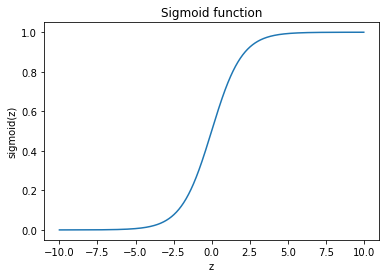

In [6]:
def sigma(z):
    return 1. / (1 + np.exp(-z))

xx = np.linspace(-10, 10, 1000)
plt.plot(xx, [sigma(x) for x in xx]);
plt.xlabel('z');
plt.ylabel('sigmoid(z)')
plt.title('Sigmoid function');

Обозначим $P(X)$ вероятностью происходящего события $X$. Тогда отношение вероятностей $OR(X)$ определяется как $\large \frac{P(X)}{1-P(X)}$.

$$OR(X) \in [0,1]$$ 

Также заметим: $$\log{OR(X)} \in \mathbb{R}$$

Будем прогнозировать логарифм отношения вероятностей с помощью МНК.

Прогнос  $p_+ = P\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right)$ с помощью логистической регрессии.

**Шаг 1.**  Вычислить значение  $w_{0}+w_{1}x_1 + w_{2}x_2 + ... = \textbf{w}^\text{T}\textbf{x}$. (Уравнение $\textbf{w}^\text{T}\textbf{x} = 0$задает гиперплоскость, разделяющую примеры на 2 класса);

**Шаг 2.** Вычислить логарифм отношения шансов: $ \log(OR_{+}) = \textbf{w}^\text{T}\textbf{x}$.

**Шаг 3.** Имея прогноз шансов на отнесение к классу "+" - $OR_{+}$, вычислить $p_{+}$  с помощью простой зависимости:

$$\large p_{+} = \frac{OR_{+}}{1 + OR_{+}} = \frac{\exp^{\textbf{w}^\text{T}\textbf{x}}}{1 + \exp^{\textbf{w}^\text{T}\textbf{x}}} = \frac{1}{1 + \exp^{-\textbf{w}^\text{T}\textbf{x}}} = \sigma(\textbf{w}^\text{T}\textbf{x})$$

В правой части мы получили как раз сигмоид-функцию.

Заметим:

$$\large p_+(\textbf{x}_\text{i}) = P\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right) = \sigma(\textbf{w}^T\textbf{x}_\text{i})$$

Тогда для класса "-" аналогичная вероятность:

$$\large p_-(\textbf{x}_\text{i})  = P\left(y_i = -1 \mid \textbf{x}_\text{i}, \textbf{w}\right)  = 1 - \sigma(\textbf{w}^T\textbf{x}_\text{i}) = \sigma(-\textbf{w}^T\textbf{x}_\text{i}) $$

Оба этих выражения можно ловко объединить в одно (следите за моими руками – не обманывают ли вас):

$$\large P\left(y = y_i \mid \textbf{x}_\text{i}, \textbf{w}\right) = \sigma(y_i\textbf{w}^T\textbf{x}_\text{i})$$

Выражение $M(\textbf{x}_\text{i}) = y_i\textbf{w}^T\textbf{x}_\text{i}$ называется *отступом (margin)* классификации на объекте $\textbf{x}_\text{i}$. Если он неотрицателен, модель не ошибается на объекте $\textbf{x}_\text{i}$, если же отрицателен – значит, класс для $\textbf{x}_\text{i}$ спрогнозирован неправильно.

Выражение $M(\textbf{x}_\text{i}) = y_i\textbf{w}^\text{T}\textbf{x}_\text{i}$ это своего рода "уверенность" модели в классификации объекта $\textbf{x}_\text{i}$:

- если отступ большой (по модулю) и положительный, это значит, что метка класса поставлена правильно, а объект находится далеко от разделяющей гиперплоскости (такой объект классифицируется уверенно);
- если отступ большой (по модулю) и отрицательный, значит метка класса поставлена неправильно, а объект находится далеко от разделяющей гиперплоскости (скорее всего такой объект – аномалия, например, его метка в обучающей выборке поставлена неправильно);
- если отступ малый (по модулю), то объект находится близко к разделяющей гиперплоскости, а знак отступа определяет, правильно ли объект классифицирован.

<img src = './img/margin.png' width=60%>

Let's now compute the likelihood of the data set i.e. the probability of observing the given vector $\textbf{y}$ from data set $X$. We'll make a strong assumption: objects come independently from one distribution (*i.i.d.*). Then, we can write

$$\Large P\left(\textbf{y} \mid \textbf{X}, \textbf{w}\right) = \prod_{i=1}^{\ell} P\left(y = y_i \mid \textbf{x}_\text{i}, \textbf{w}\right),$$

where $\ell$ is the length of data set $\textbf{X}$ (number of rows).

As usual, let's take the logarithm of this expression because a sum is much easier to optimize than the product:

$$\Large \log P\left(\textbf{y} \mid \textbf{X}, \textbf{w}\right) = \log \prod_{i=1}^{\ell} P\left(y = y_i \mid \textbf{x}_\text{i}, \textbf{w}\right) = \log \prod_{i=1}^{\ell} \sigma(y_i\textbf{w}^\text{T}\textbf{x}_\text{i})   = $$

$$\Large  = \sum_{i=1}^{\ell} \log \sigma(y_i\textbf{w}^\text{T}\textbf{x}_\text{i}) = \sum_{i=1}^{\ell} \log \frac{1}{1 + \exp^{-y_i\textbf{w}^\text{T}\textbf{x}_\text{i}}} = - \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^\text{T}\textbf{x}_\text{i}})$$

Maximizing the likelihood is equivalent to minimizing the expression:

$$\Large \mathcal{L_{\log}} (\textbf X, \textbf{y}, \textbf{w}) = \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^\text{T}\textbf{x}_\text{i}}).$$

This is *logistic* loss function that is summed over all objects in the training set.

Let's look at the new function as a function of margin $L(M) = \log (1 + \exp^{-M})$ and plot it along with *zero-one loss* graph, which simply penalizes the model for error on each object by 1 (negative margin): $L_{1/0}(M) = [M < 0]$.

<img src = '../../img/logloss_margin_eng.png' width=60%>

The picture reflects the idea that, if we are not able to directly minimize the number of errors in the classification problem (at least not by gradient methods - derivative of the zero-one loss function at zero turns to infinity), we can minimize its upper bounds. For the logistic loss function (where the logarithm is binary, but this does not matter), the following is valid:

$$\Large \mathcal{L_{1/0}} (\textbf X, \textbf{y}, \textbf{w}) = \sum_{i=1}^{\ell} [M(\textbf{x}_\text{i}) < 0] \leq \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^\text{T}\textbf{x}_\text{i}}) = \mathcal{L_{\log}} (\textbf X, \textbf{y}, \textbf{w}), $$

where $\mathcal{L_{1/0}} (\textbf X, \textbf{y})$ is simply the number of errors of logistic regression with weights $\textbf{w}$ on a data set $(\textbf X, \textbf{y})$.

Thus, by reducing the upper bound of $\mathcal{L_{log}}$ by the number of classification errors, we hope to reduce the number of errors itself.

### $L_2$-Regularization of Logistic Loss
$L_2$-regularization of logistic regression is almost the same as in the case of ridge regression. Instead of minimizing the function $\mathcal{L_{\log}} (\textbf X, \textbf{y}, \textbf{w})$ we minimize the following:

$$\Large \mathcal{J}(\textbf X, \textbf{y}, \textbf{w}) = \mathcal{L_{\log}} (\textbf X, \textbf{y}, \textbf{w}) + \lambda |\textbf{w}|^2$$

In the case of logistic regression, a reverse regularization coefficient $C = \frac{1}{\lambda}$ is typically introduced. Then the solution to the problem would be:

$$\Large \widehat{\textbf w}  = \arg \min_{\textbf{w}} \mathcal{J}(\textbf X, \textbf{y}, \textbf{w}) =  \arg \min_{\textbf{w}}\ (C\sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^\text{T}\textbf{x}_\text{i}})+ |\textbf{w}|^2)$$ 

Next, we'll look at an example that allows us to intuitively understand one of the interpretations of regularization.

### Useful resources
- Medium ["story"](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-4-linear-classification-and-regression-44a41b9b5220) based on this notebook
- If you read Russian: an [article](https://habrahabr.ru/company/ods/blog/323890/) on Habrahabr with ~ the same material. And a [lecture](https://youtu.be/oTXGQ-_oqvI) on YouTube
- A nice and concise overview of linear models is given in the book [“Deep Learning”](http://www.deeplearningbook.org) (I. Goodfellow, Y. Bengio, and A. Courville).
- Linear models are covered practically in every ML book. We recommend “Pattern Recognition and Machine Learning” (C. Bishop) and “Machine Learning: A Probabilistic Perspective” (K. Murphy).
- If you prefer a thorough overview of linear model from a statistician’s viewpoint, then look at “The elements of statistical learning” (T. Hastie, R. Tibshirani, and J. Friedman).
- The book “Machine Learning in Action” (P. Harrington) will walk you through implementations of classic ML algorithms in pure Python.
- [Scikit-learn](http://scikit-learn.org/stable/documentation.html) library. These guys work hard on writing really clear documentation.
- Scipy 2017 [scikit-learn tutorial](https://github.com/amueller/scipy-2017-sklearn) by Alex Gramfort and Andreas Mueller.
- One more [ML course](https://github.com/diefimov/MTH594_MachineLearning) with very good materials.
- [Implementations](https://github.com/rushter/MLAlgorithms) of many ML algorithms. Search for linear regression and logistic regression.